In [8]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

# Our problem is a data science problem regarding climate change.
# We know that as the climate keep worsing, those countries begin to take measures and developing new technology to reduce the CO2 emission.
# However, it seems that human are not really take this issue seriously enough.
# One good measurement in the effort of handling climate change is  the percentage of renewable energy in the overall comsumption in energy

# We want to HAVE A INSIGHT that if no more new leap in current technology or policy, what WILL BE THE SHARE OF RENEWABLE ENERGY IN THE FUTURE? we will predict it

In [2]:
countries_to_study = [
    "Austria", "Belgium", "Bulgaria", "Croatia", "Cyprus", "Czech Republic",
    "Denmark", "Estonia", "Finland", "France", "Germany", "Greece", "Hungary",
    "Ireland", "Italy", "Latvia", "Lithuania", "Luxembourg", "Malta",
    "Netherlands", "Poland", "Portugal", "Romania", "Slovakia", "Slovenia",
    "Spain", "Sweden", "United States", "South Korea", "Japan", "India",
    "United Kingdom","Canada"
]
len(countries_to_study)


33

# this are the contries(USA,Canada,UK,European(will be treat as a whole),India,South Korean,India,Japen)that is going to be study

# We got those varible in our database that might be relevant to this problem:


# 1.Population
# 2.Fossil fuels (TWh)
# 3.Industry jobs as a share of total employment
# 4.Annual greenhouse gas emissions in CO₂ equivalents 
# 5.Fossil fuel consumption worldwide
# 6.growth of electricity generated by Renewables fuel per year
# 7.Industry as % of total employment



In [3]:
data_to_be_done=pd.read_csv("/Users/catillzhang/Downloads/final_cleaned_merged_data.csv")
data_to_be_done.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 10 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Entity                                                                 864 non-null    object 
 1   Year                                                                   864 non-null    int64  
 2   Population                                                             864 non-null    int64  
 3   Fossil fuels (TWh)                                                     807 non-null    float64
 4   Annual greenhouse gas emissions in CO₂ equivalents                     864 non-null    float64
 5   Renewables (TWh growth - equivalent)                                   819 non-null    float64
 6   Annual CO₂ emissions per GDP (kg per international-$)                  864 non-null    flo

# We have to build a heatmap to find the varible that has a cor-relation with our predict varible.

In [4]:
data_to_be_done.columns

Index(['Entity', 'Year', 'Population', 'Fossil fuels (TWh)',
       'Annual greenhouse gas emissions in CO₂ equivalents',
       'Renewables (TWh growth - equivalent)',
       'Annual CO₂ emissions per GDP (kg per international-$)',
       'Industry as % of total employment -- ILO modelled estimates, May 2017',
       'Renewables - % electricity', 'GDP per capita'],
      dtype='object')

In [5]:
data_to_be_done=data_to_be_done[['Year', 'Population', 'Fossil fuels (TWh)',
       'Annual greenhouse gas emissions in CO₂ equivalents',
       'Renewables (TWh growth - equivalent)',
       'Annual CO₂ emissions per GDP (kg per international-$)',
       'Industry as % of total employment -- ILO modelled estimates, May 2017',
       'Renewables - % electricity', 'GDP per capita']]

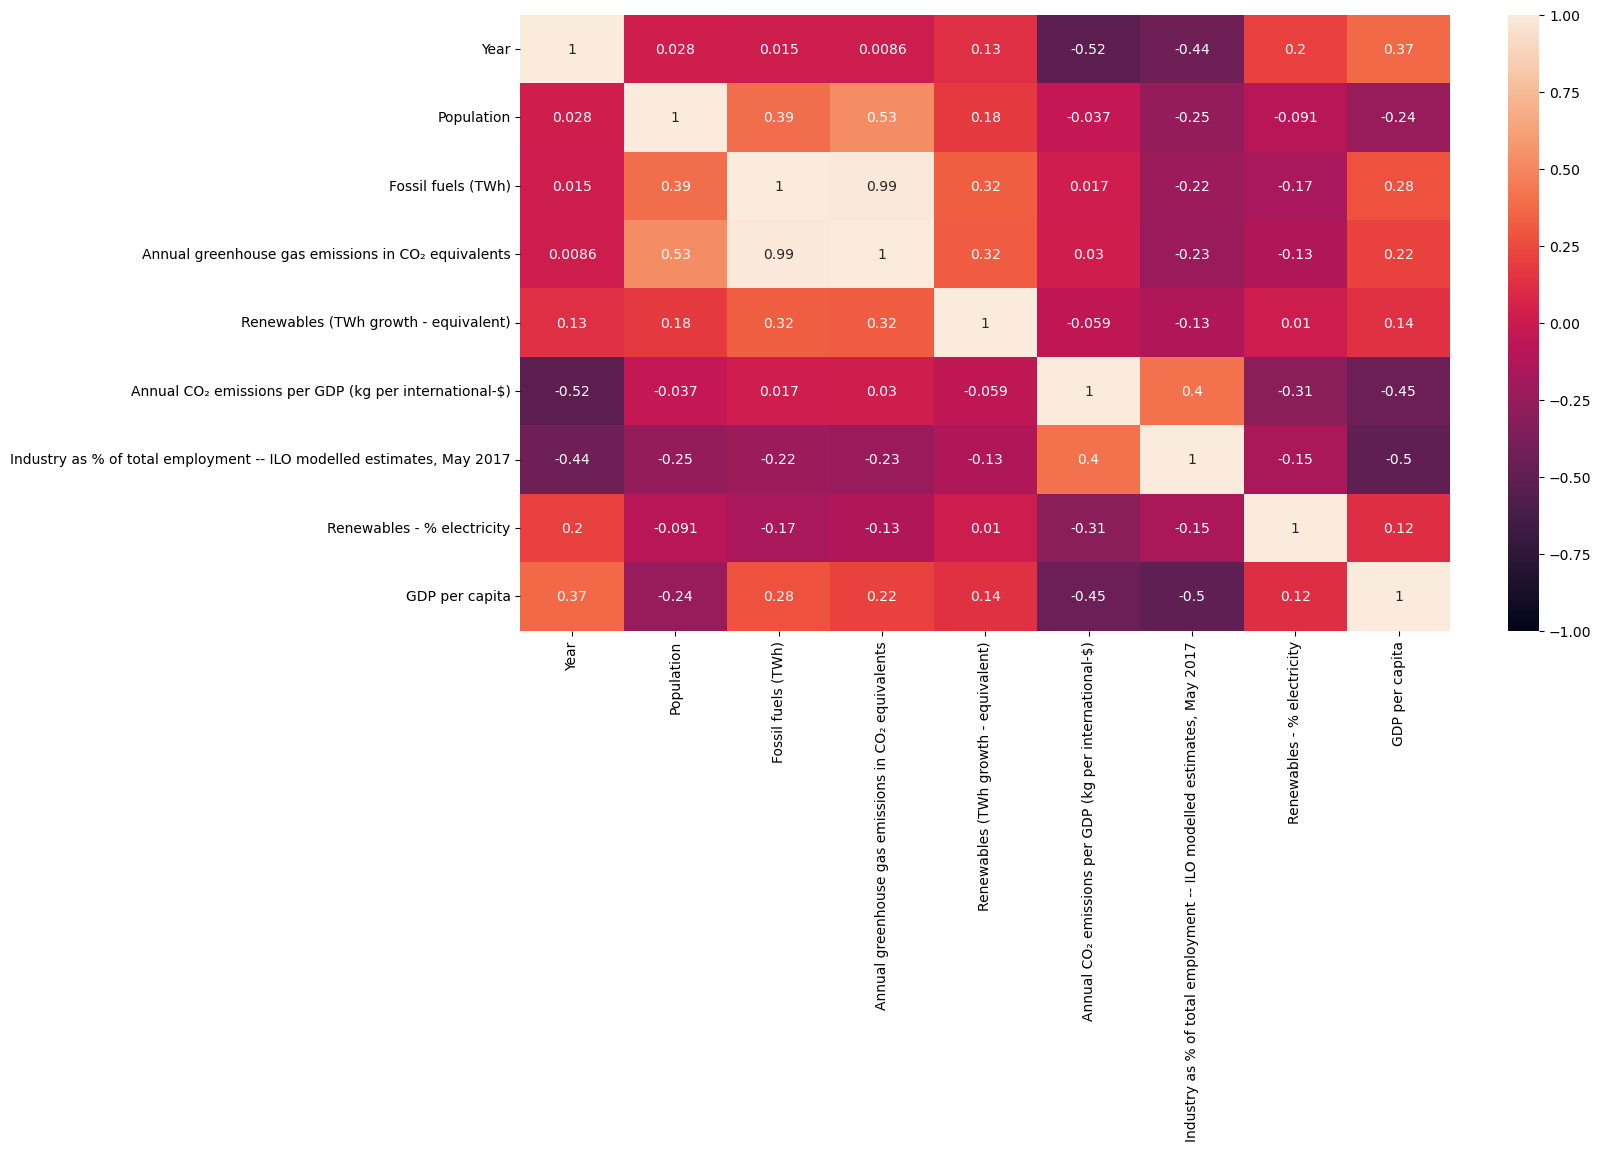

In [9]:
sb.heatmap(data_to_be_done.corr(),annot=True,vmin=-1,vmax=1)
plt.gcf().set_size_inches(15, 8)

# 显示图表
plt.show()

# From this plot, we can find that:
# 1.the "Fossil fuels (TWh)" and "Annual greenhouse gas emissions in CO₂ equivalent" is almost equalvalent. So we can conclude that by analyzing the power structure of electrcity genertion can offer us a clear view of the emision of CO2 thus the effort that is done with the climate change and reduce co2 emmision.


# 2.our predict varaible has a relatively good correlation with the year, obviously it it kinda of time-series.

# 3. Population, even though its co-relation with "Renewables - % electricity " is not strong enough, but we will still take it into the varible that is going to use to predict the result. Because by domain's experts' knowledge,  the interaction with the Population and industrial rate can make a great impact on the value we are going to predict.So we will keep it for future use.

# 4.Annual CO₂ emissions per GDP (kg per international) has the strongest relation with our desire varible, so we will definitely take this into consideration. As long as the country has a history of heavy industry or it is quite poor and un-develped, its industry will be more fossil fuel-based,thus these is a strong indicator of what the industrial structure is, and it can corlaberate with the industrial rate to give us a view of the industry eco-system of that specific country

# 5.another interesting point is that the change in the usage of Renewable energy do not indicate anything about the share of clean energy in the total energy consumption.We will explain this in  the following paper

# 6. we give up the "Fossil fuels (TWh)",because it has a relativly low co-relation with the 'Year',which means it would be very unprecious to use a time-series to predict it.So we just give it up.

# now let us check the co-relation of the varible we choose.

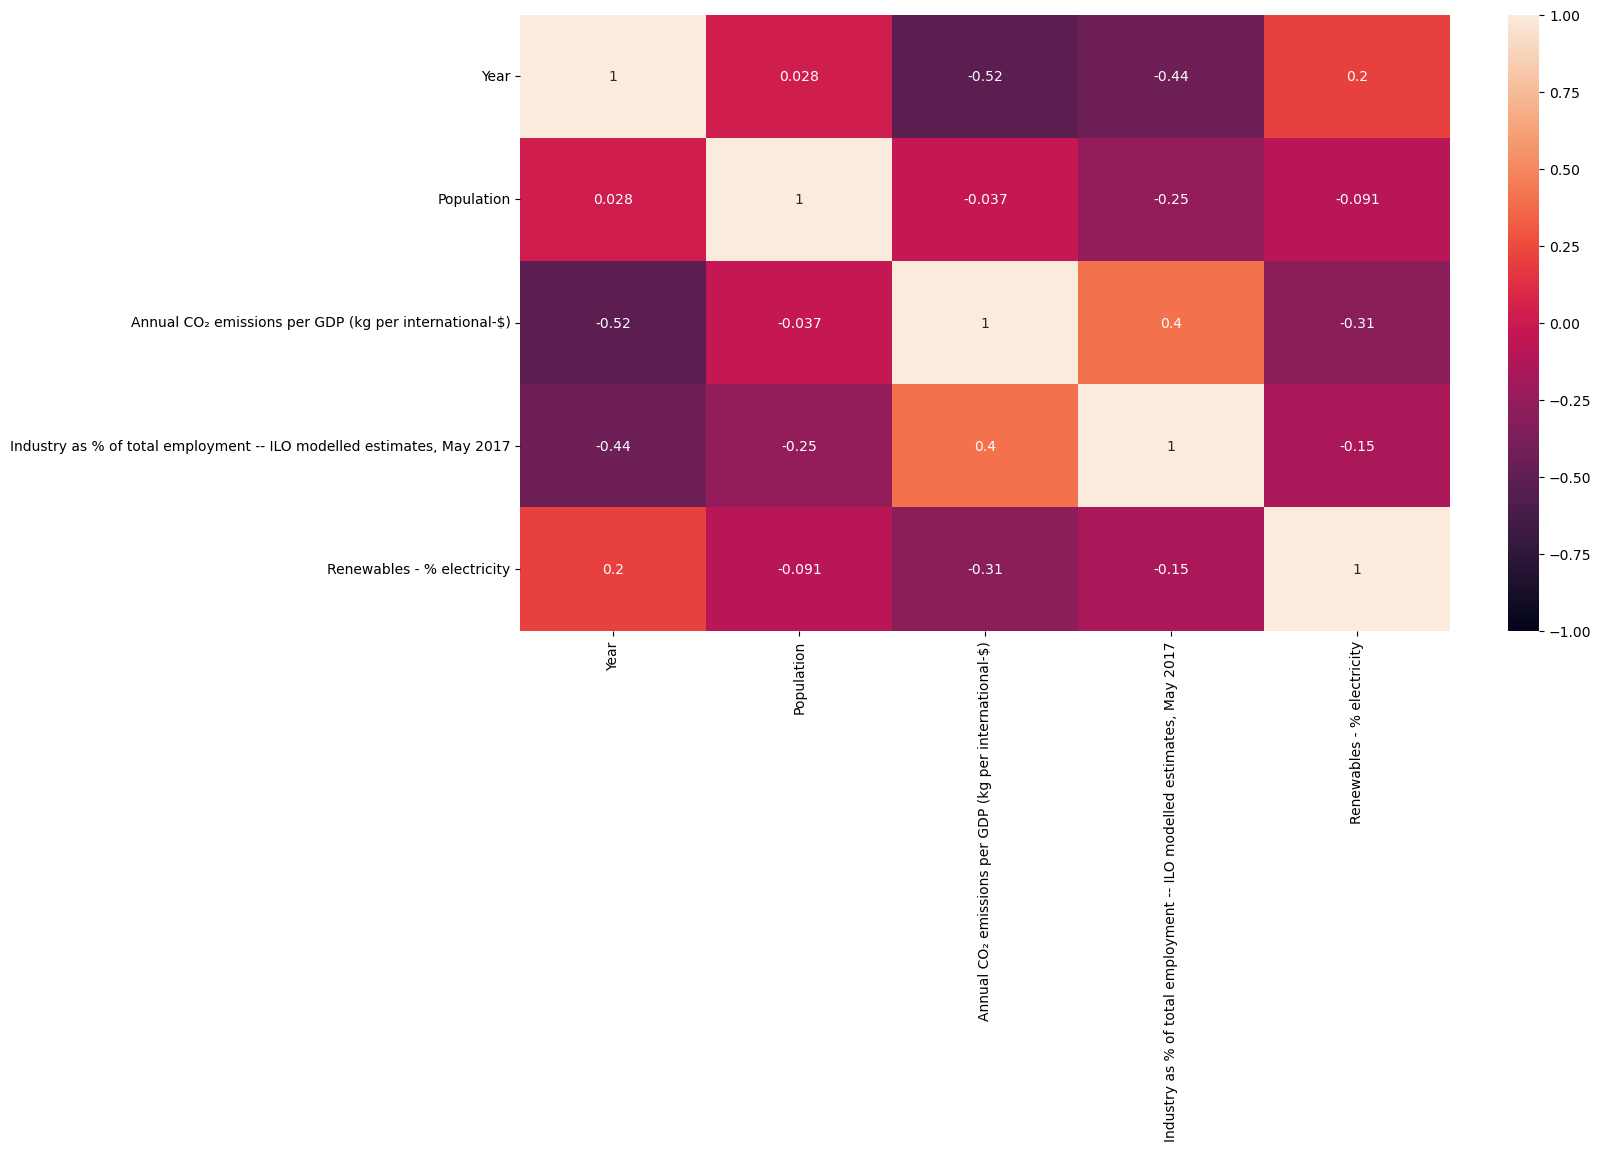

In [11]:
data_to_be_done=data_to_be_done[['Year', 'Population',
       'Annual CO₂ emissions per GDP (kg per international-$)',
       'Industry as % of total employment -- ILO modelled estimates, May 2017',
       'Renewables - % electricity']]
sb.heatmap(data_to_be_done.corr(),annot=True,vmin=-1,vmax=1)
plt.gcf().set_size_inches(15, 8)

# 显示图表
plt.show()

# The varible we have to use time-series to predict first(Population,Industrial Rate, Anuual CO2 per GDP), two of which has a very strong relation with the Year, and that is perfect.
#  And by looking at the heatmap we can find that most of the  varible have a very low co-relation with each other, and that is very ideal for regression

# First from our domain experts' knowledge, we know that each country has their own enviroment, which means the catagorical variable-'Entity'(country name) is definitely a factor we need to take into concideration

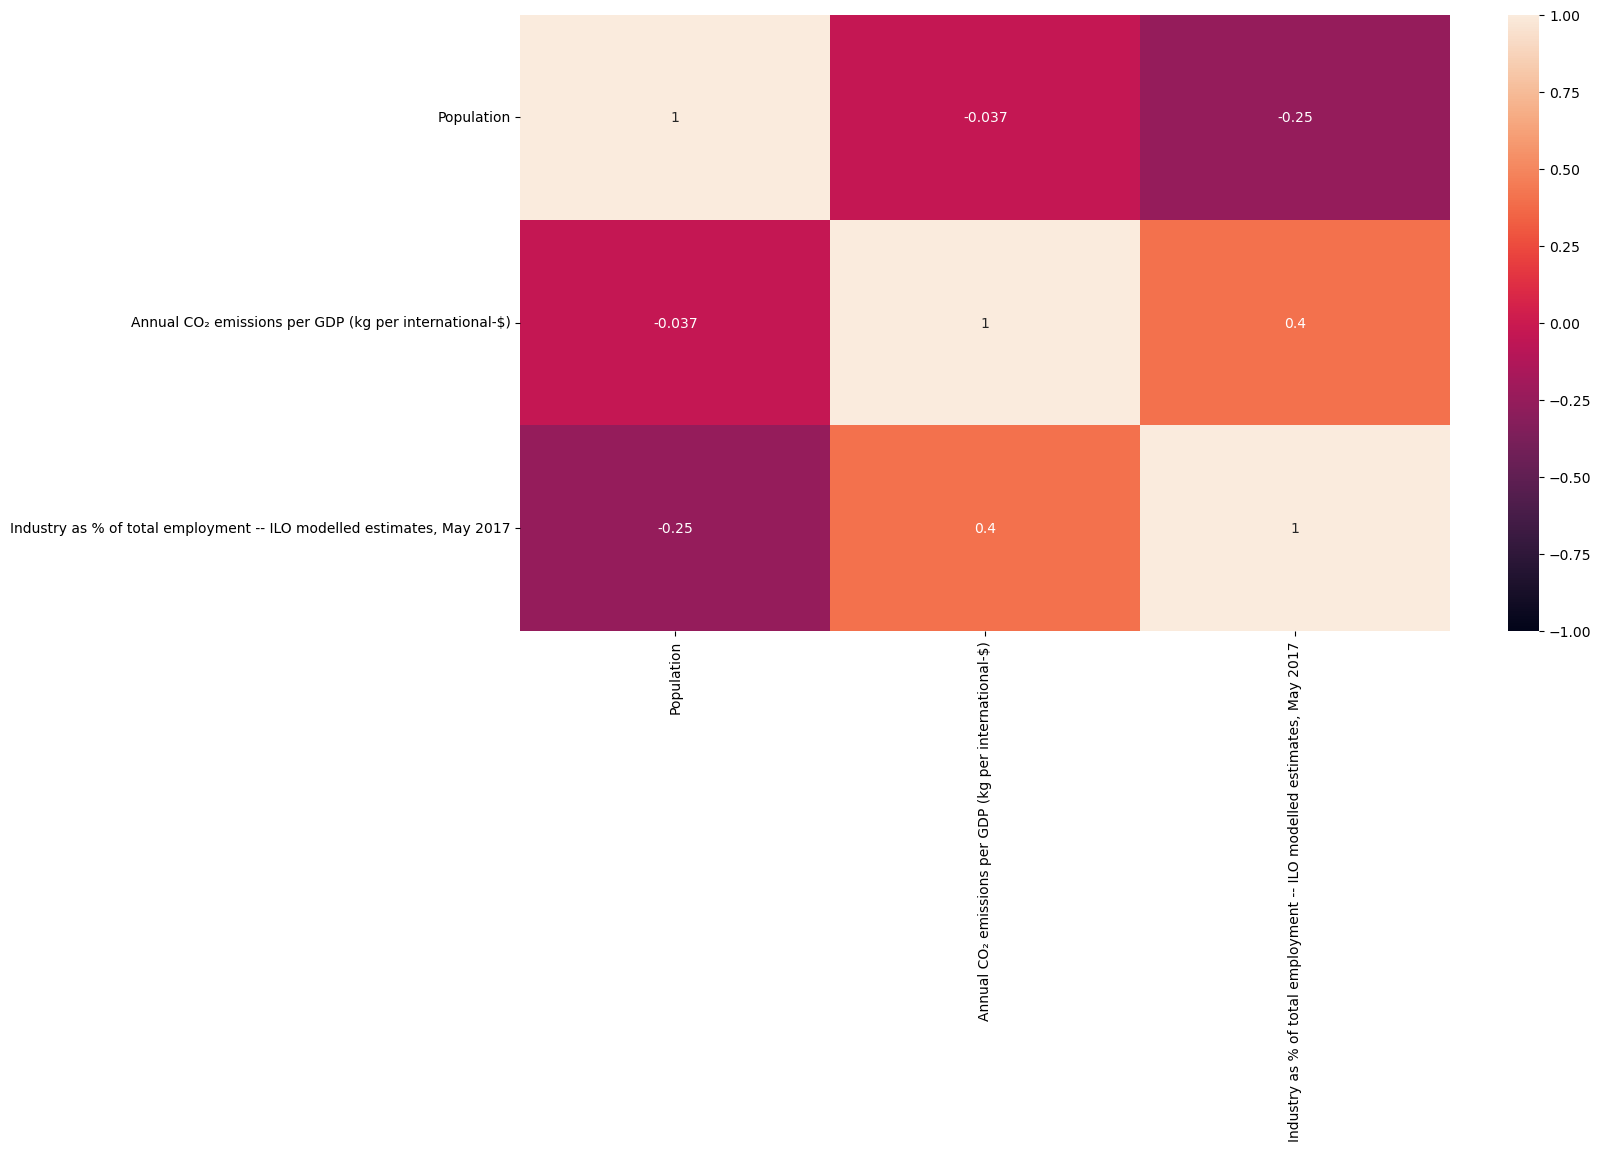

In [12]:
data_to_be_done=data_to_be_done[['Population',
       'Annual CO₂ emissions per GDP (kg per international-$)',
       'Industry as % of total employment -- ILO modelled estimates, May 2017',]]
sb.heatmap(data_to_be_done.corr(),annot=True,vmin=-1,vmax=1)
plt.gcf().set_size_inches(15, 8)

# 显示图表
plt.show()

# 

# We want to find the most relevant factors to this problem, and the factors should be as independent as possible. 

In [77]:
path="/Users/catillzhang/Downloads/annual-change-renewables.csv"
data_of_rg = pd.read_csv(path)

# first we upload the dataset 1 for this problem: the usage of clean energy

In [78]:
data_of_rg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5374 entries, 0 to 5373
Data columns (total 4 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Entity                                5374 non-null   object 
 1   Code                                  4063 non-null   object 
 2   Year                                  5374 non-null   int64  
 3   Renewables (TWh growth - equivalent)  5374 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 168.1+ KB


In [79]:
# 0:Name of that country
# 1:Code(useless in this project)
# 2:Year(form 1965 to 2022)
# 3:Solar and wind electricity per capita

In [80]:
data_of_rg=data_of_rg[data_of_rg['Entity'].isin(countries_to_study)]
data_of_rg.drop("Code",axis=1,inplace=True)
data_of_rg.head()

,Entity,Year,Renewables (TWh growth - equivalent)
399,Austria,1966,3.690323
400,Austria,1967,1.085213
401,Austria,1968,1.440052
402,Austria,1969,-4.337902
403,Austria,1970,13.518471


In [81]:
max(data_of_rg['Year'].unique())

2022

In [82]:
min(data_of_rg['Year'].unique())

1966

# We also has to use some domain experts' knowledge to prepare the data. 
# In 1988，the IPCC was set, and that is a milestone human began to take climate change seriously
# So we decide to use the data from 1988 onward to exam human's effort in fighting climate change

In [83]:
data_of_rg=data_of_rg[data_of_rg['Year']>1988]

In [84]:
data_of_rg.head()

,Entity,Year,Renewables (TWh growth - equivalent)
422,Austria,1989,-0.471924
423,Austria,1990,-10.371399
424,Austria,1991,0.080200
425,Austria,1992,10.407219
426,Austria,1993,5.610077


# Now we have clean the data, and let us draw the tendency of the change in the consumption of renuable energy in the give countries

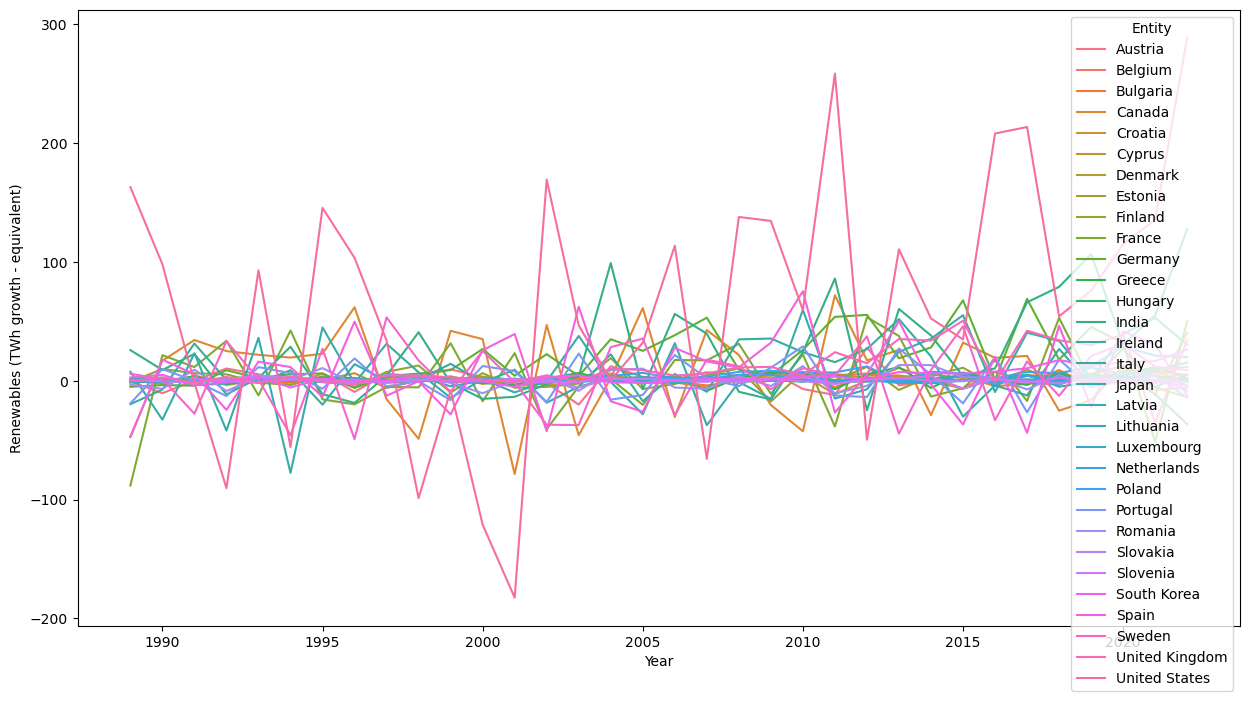

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# 使用 lineplot 直接绘制
g = sns.lineplot(x='Year', y='Renewables (TWh growth - equivalent)', hue='Entity', data=data_of_rg)

# 调整图表大小，确保所有细节都清晰可见
plt.gcf().set_size_inches(15, 8)

# 显示图表
plt.show()

# We can find that the plot is too messy, so we will treat the EU as a whole. If that is a value varible,we will use the sum of it. if that is a percentage(like Industry as % of total employment ),we will use the average

In [86]:
EU = [
    "Austria", "Belgium", "Bulgaria", "Croatia", "Cyprus", "Czech Republic",
    "Denmark", "Estonia", "Finland", "France", "Germany", "Greece", "Hungary",
    "Ireland", "Italy", "Latvia", "Lithuania", "Luxembourg", "Malta",
    "Netherlands", "Poland", "Portugal", "Romania", "Slovakia", "Slovenia",
    "Spain", "Sweden"
]
data_EU=data_of_rg[data_of_rg['Entity'].isin(EU)]

In [87]:
data_EU.info()

<class 'pandas.core.frame.DataFrame'>
Index: 823 entries, 422 to 4569
Data columns (total 3 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Entity                                823 non-null    object 
 1   Year                                  823 non-null    int64  
 2   Renewables (TWh growth - equivalent)  823 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 25.7+ KB


In [88]:
list_year=data_EU['Year'].unique()
list_year.sort()
data_of_rg_final=data_of_rg.copy()
for i in list_year:
    tdf=data_of_rg[data_of_rg['Year']==i]
    new_row = pd.DataFrame({'Entity': ["EU"], 'Year': [i],'Renewables (TWh growth - equivalent)':[tdf["Renewables (TWh growth - equivalent)"].sum()]})
    data_of_rg_final=pd.concat([data_of_rg_final,new_row],axis=0)
data_of_rg_final=data_of_rg_final[data_of_rg_final['Entity'].isin(EU)==False]
data_of_rg_final=data_of_rg_final.reindex()

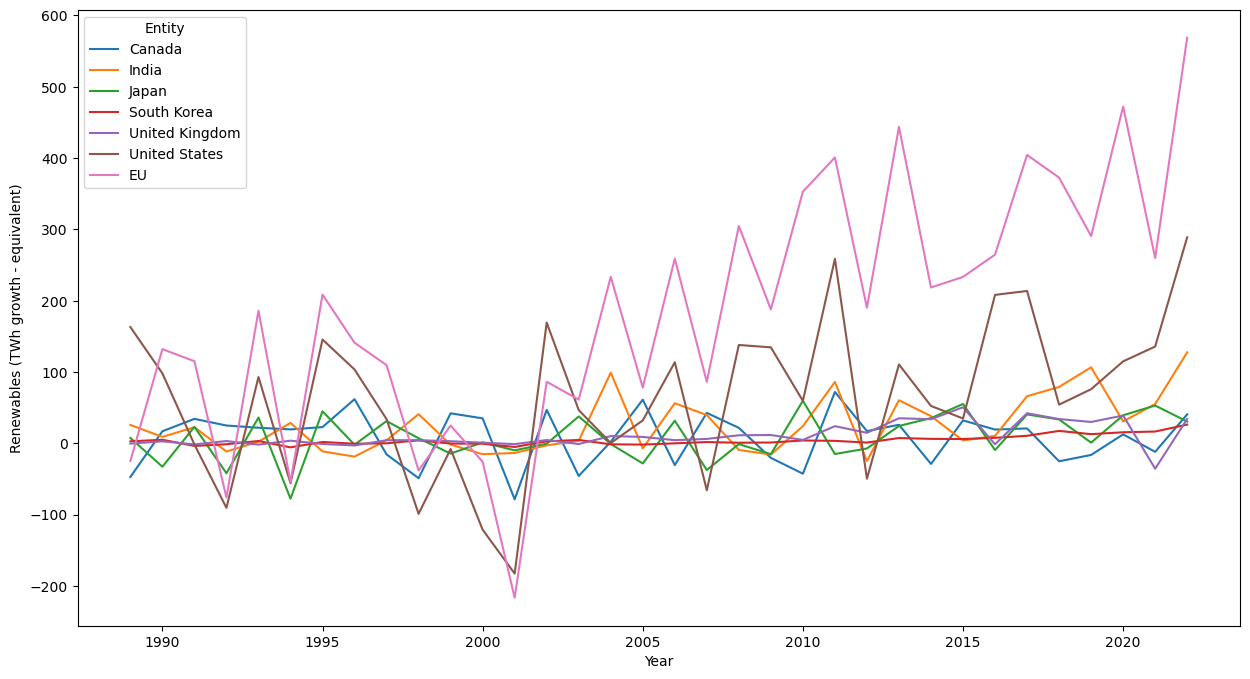

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

# 使用 lineplot 直接绘制
g = sns.lineplot(x='Year', y='Renewables (TWh growth - equivalent)', hue='Entity', data=data_of_rg_final)

# 调整图表大小，确保所有细节都清晰可见
plt.gcf().set_size_inches(15, 8)

# 显示图表
plt.show()

In [90]:
countryies_to_study = ["United States", "South Korea", "Japan", "India","United Kingdom","Canada",'EU']

In [91]:
data_sum=pd.DataFrame(columns=["Entity","Renewables (TWh growth - equivalent)"])
for i in countryies_to_study:
    data_sum1=data_of_rg_final[data_of_rg_final['Entity']==i]
    sum1=data_sum1['Renewables (TWh growth - equivalent)'].sum()
    new_row = pd.DataFrame({'Entity': [i], 'Renewables (TWh growth - equivalent)':[sum1]})
    data_sum=pd.concat([data_sum,new_row],axis=0)
data_sum

,Entity,Renewables (TWh growth - equivalent)
0,United States,2208.084097
0,South Korea,146.425519
0,Japan,302.696474
0,India,891.526169
0,United Kingdom,378.469535
0,Canada,285.969784
0,EU,6253.272227


/Users/catillzhang/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


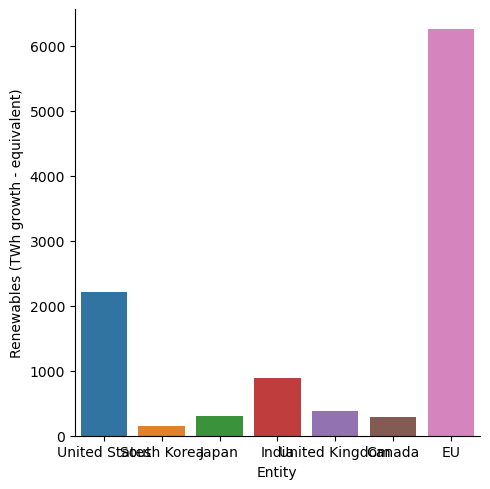

In [92]:
g=sb.catplot(x="Entity",y="Renewables (TWh growth - equivalent)",kind="bar",data=data_sum)

# we can conclude the following conclusions:
# 1. the EU make the  significiantly greatest contribution in pushing the green energy
# 2. those other countries have a less significiant results


# BUT WE ALSO NEDD TO PAY ATTENTION THAT:
# 1.IF THE COUNTRY HAVE A QUITE WEAK HISTORY OF ADOPTING THOSE CLEAN ENERGY, THE INCREASE MIGHT SEEM TO BE GREAT
# EG:THE INDIA is relatively poor in the past and the industry base is quite weak. so the increasement seem to be significiant
# on the other hand, that also explains why Japan has a weak increasement
# 2.The increase usage of clean energy may not indicate the decrease of using fossil fur. Becasue the overall need for poewer will increase by the time being.
# 3.We also has to take the population into consideration. As we treat EU as a whole, THE POPULATION IS GREAT, AND THE ENERGY CONSUMPTION IS ALSO GREAT!
# we can not simply give out a conclution of which country cares about the climate more merely based on this data.

# So let us study the percentage renewable energy composed in the overall energy consumption

In [93]:
data_perc_re=pd.read_csv("/Users/catillzhang/Downloads/share-electricity-renewables.csv")


In [94]:
data_perc_re=pd.read_csv("/Users/catillzhang/Downloads/share-electricity-renewables.csv")
countries_to_study = [
    "Austria", "Belgium", "Bulgaria", "Croatia", "Cyprus", "Czech Republic",
    "Denmark", "Estonia", "Finland", "France", "Germany", "Greece", "Hungary",
    "Ireland", "Italy", "Latvia", "Lithuania", "Luxembourg", "Malta",
    "Netherlands", "Poland", "Portugal", "Romania", "Slovakia", "Slovenia",
    "Spain", "Sweden", "United States", "South Korea", "Japan", "India",
    "United Kingdom","Canada"
]
data_perc_re=data_perc_re[data_perc_re['Entity'].isin(countries_to_study)]
data_perc_re.drop("Code",axis=1,inplace=True)



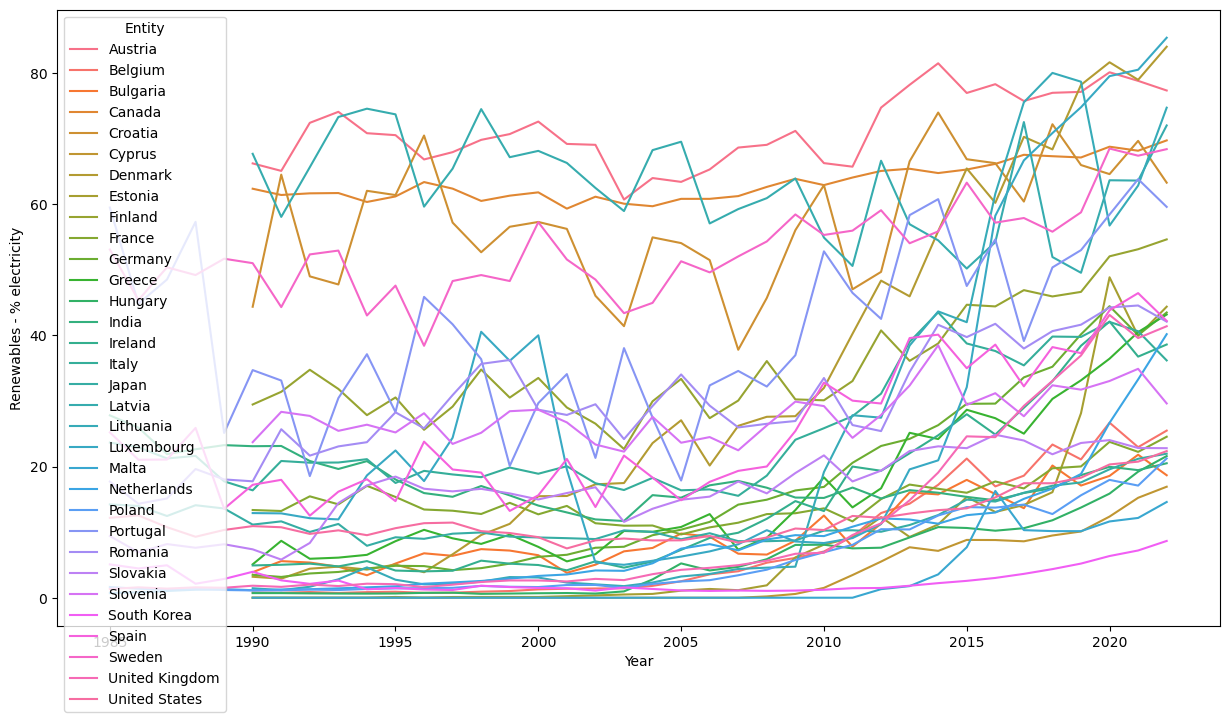

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

# 使用 lineplot 直接绘制
g = sns.lineplot(x='Year', y='Renewables - % electricity', hue='Entity', data=data_perc_re)

# 调整图表大小，确保所有细节都清晰可见
plt.gcf().set_size_inches(15, 8)

# 显示图表
plt.show()

In [96]:
EU = [
    "Austria", "Belgium", "Bulgaria", "Croatia", "Cyprus", "Czech Republic",
    "Denmark", "Estonia", "Finland", "France", "Germany", "Greece", "Hungary",
    "Ireland", "Italy", "Latvia", "Lithuania", "Luxembourg", "Malta",
    "Netherlands", "Poland", "Portugal", "Romania", "Slovakia", "Slovenia",
    "Spain", "Sweden"
]
length=len(EU)
data_EU_prec_re=data_perc_re[data_perc_re['Entity'].isin(EU)]
list_year=data_EU_prec_re['Year'].unique()
list_year.sort()
data_perc_re_final=data_perc_re.copy()
for i in list_year:
    tdf=data_perc_re[data_perc_re['Year']==i]
    new_row = pd.DataFrame({'Entity': ["EU"], 'Year': [i],'Renewables - % electricity':[tdf["Renewables - % electricity"].sum()/length]})
    data_perc_re_final=pd.concat([data_perc_re_final,new_row],axis=0)
data_perc_re_final=data_perc_re_final[data_perc_re_final['Entity'].isin(EU)==False]
data_perc_re_final=data_perc_re_final[data_perc_re_final['Year']<2022]
data_perc_re_final=data_perc_re_final.reindex()


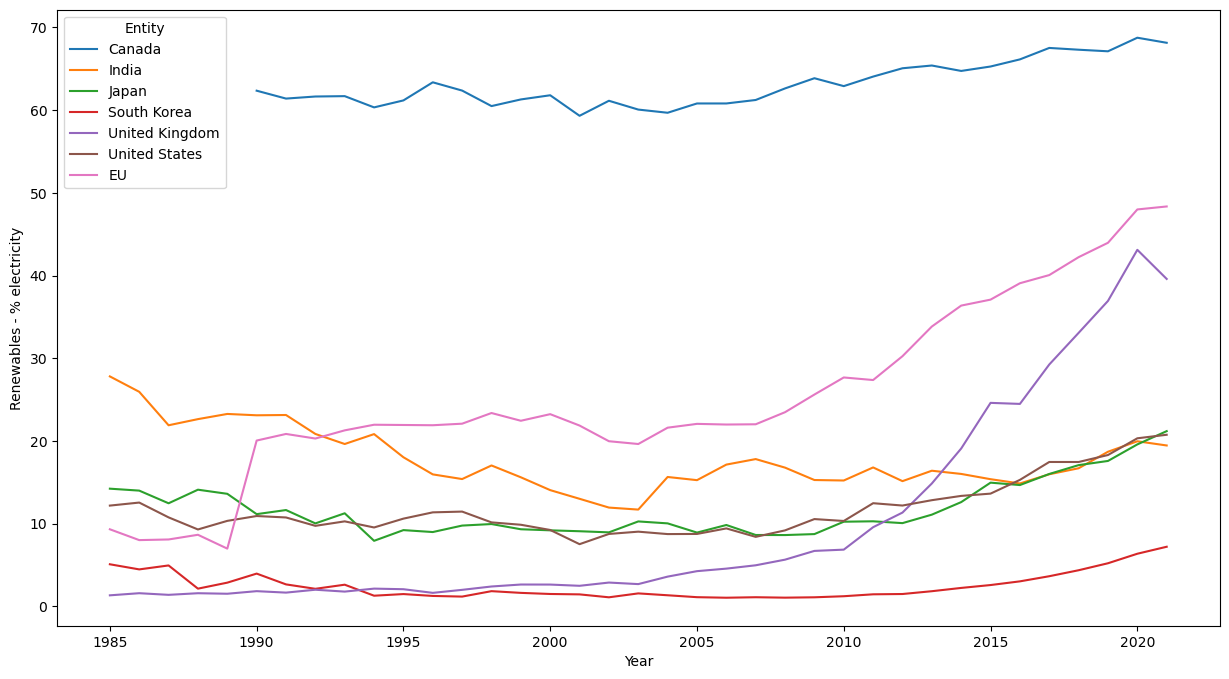

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

# 使用 lineplot 直接绘制
g = sns.lineplot(x='Year', y='Renewables - % electricity', hue='Entity', data=data_perc_re_final)

# 调整图表大小，确保所有细节都清晰可见
plt.gcf().set_size_inches(15, 8)

# 显示图表
plt.show()

In [98]:
data_div=pd.DataFrame(columns=["Entity","Renewables - % electricity"])
for i in countryies_to_study:
    data_A = data_perc_re_final[(data_perc_re_final['Entity'] == i) & (data_perc_re_final['Year'] == 1990)]
    data_B = data_perc_re_final[(data_perc_re_final['Entity'] == i) & (data_perc_re_final['Year'] == 2021)]
    div=data_B.iloc[0]["Renewables - % electricity"]-data_A.iloc[0]["Renewables - % electricity"]
    new_row = pd.DataFrame({'Entity': [i], 'Renewables - % electricity':[div]})
    data_div=pd.concat([data_div,new_row],axis=0)
data_div

,Entity,Renewables - % electricity
0,United States,9.825707
0,South Korea,3.246265
0,Japan,10.037313
0,India,-3.648930
0,United Kingdom,37.753722
0,Canada,5.791836
0,EU,28.304950


/Users/catillzhang/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


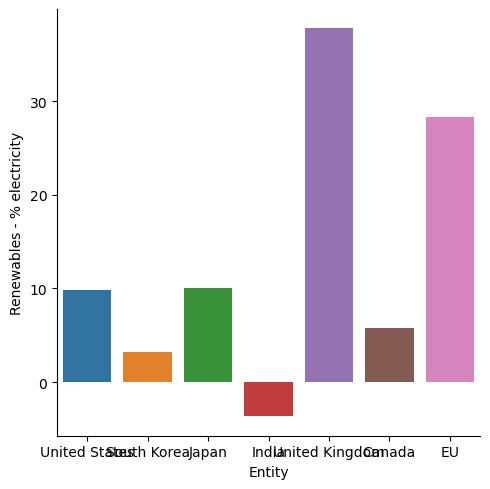

In [99]:
g=sb.catplot(x="Entity",y="Renewables - % electricity",kind="bar",data=data_div)

# From this chart, we can conclude that:
# 1.Just like what we have explain in the previous part,the increase in the absolute amount in the clean energy comsumption might not realy indicate the change in the energy structure.

# just look at india。 although the overall consumption of clean energy increase, the percentage of it increases these year.

# 2.We can not judge the effort merely on comparing the percentage. The original energy struture of the countries also counts
# like Canada, which has a relatively long history of using clean energy, so we can not say it has made the biggest effort
# Compared to UK and EU, the change is significant. Both of them hava a history of depending on fossil fuel, and we can not see the percentage of clean energy boost greatly
# So we can conclude that they are the countries that really make efforts in handling climate change

# Then we come to secondary stage of this problems---how long would it take for these country to step into a eco-friendly coutry.
# We formulate this problems as "By when can those countries reach a 95% portion of clean energy in the overall energy comsumtion"?

# Model 1: adapting Multivarible liner regression as well as random forest

# It is important to figure out that we need more features to do the prediction
# Bacause the GDP, the population, the industrial structure, these factors can play a significant roling in affecting these progress

# Model2: adapting nuture night work to predict.

In [100]:
data_popu=pd.read_csv("/Users/catillzhang/Downloads/population-and-demography.csv")
data_popu=data_popu[["Country name","Year","Population"]]
countries_to_study = [
    "Austria", "Belgium", "Bulgaria", "Croatia", "Cyprus", "Czech Republic",
    "Denmark", "Estonia", "Finland", "France", "Germany", "Greece", "Hungary",
    "Ireland", "Italy", "Latvia", "Lithuania", "Luxembourg", "Malta",
    "Netherlands", "Poland", "Portugal", "Romania", "Slovakia", "Slovenia",
    "Spain", "Sweden", "United States", "South Korea", "Japan", "India",
    "United Kingdom","Canada"
]
data_popu=data_popu[data_popu['Country name'].isin(countries_to_study)]
data_popu.head()
countryies_to_study = ["United States", "South Korea", "Japan", "India","United Kingdom","Canada",'EU']

In [101]:
EU = [
    "Austria", "Belgium", "Bulgaria", "Croatia", "Cyprus", "Czech Republic",
    "Denmark", "Estonia", "Finland", "France", "Germany", "Greece", "Hungary",
    "Ireland", "Italy", "Latvia", "Lithuania", "Luxembourg", "Malta",
    "Netherlands", "Poland", "Portugal", "Romania", "Slovakia", "Slovenia",
    "Spain", "Sweden"
]
length=len(EU)
data_popu_EU=data_popu[data_popu['Country name'].isin(EU)]
list_year=data_EU_prec_re['Year'].unique()
list_year.sort()
data_popu_final=data_popu.copy()
list_year=data_popu['Year'].unique()
list_year.sort()
for i in list_year:
    tdf=data_popu[data_popu['Year']==i]
    new_row = pd.DataFrame({'Country name': ["EU"], 'Year': [i],'Population':[tdf['Population'].sum()]})
    data_popu_final=pd.concat([data_popu_final,new_row],axis=0)
data_popu_final=data_popu_final[data_popu_final['Country name'].isin(EU)==False]
data_popu_final=data_popu_final.reindex()
data_popu_final=data_popu_final[data_popu_final['Year']>1989]
data_popu_final=data_popu_final.reindex()
data_popu_final
data_popu_final.to_csv('/Users/catillzhang/Downloads/日你妈操了.csv', index=False)

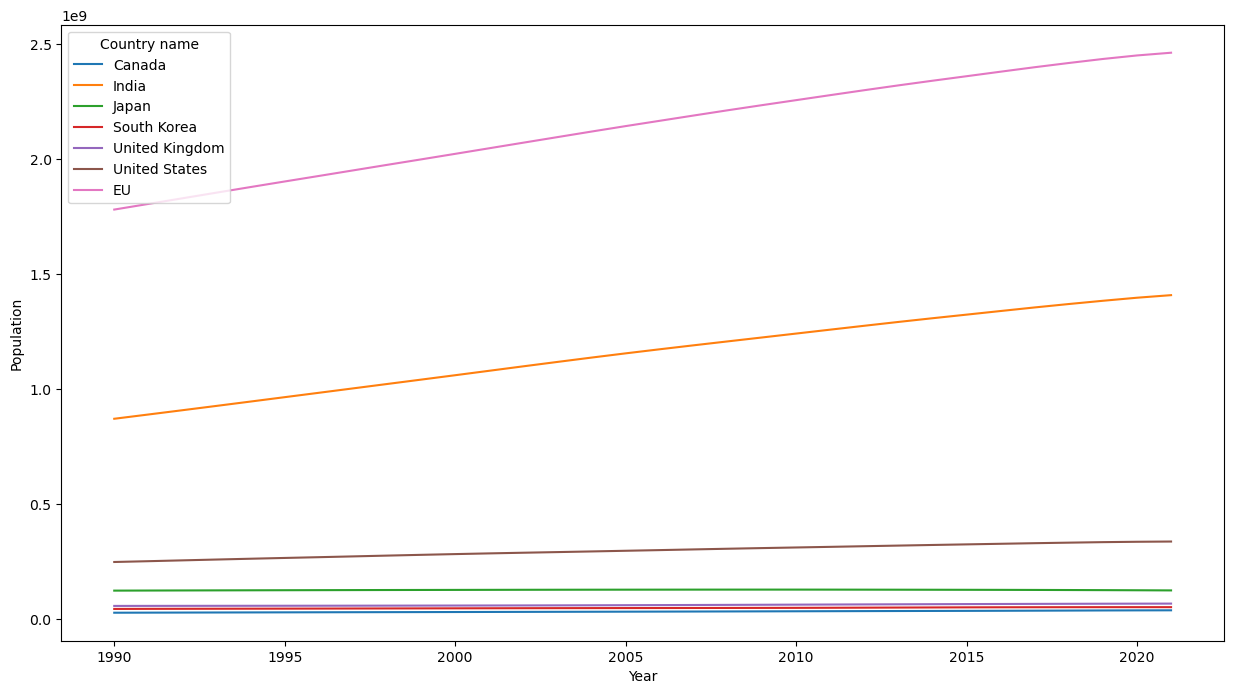

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

# 使用 lineplot 直接绘制
g = sns.lineplot(x='Year', y='Population', hue='Country name', data=data_popu_final)

# 调整图表大小，确保所有细节都清晰可见
plt.gcf().set_size_inches(15, 8)

# 显示图表
plt.show()

In [103]:
list_year=data_popu['Year'].unique()
list_year.sort()
list_year

array([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2021])

In [104]:
data_popu_clean=pd.DataFrame(data_popu_final['Population'])
data_perc_re_final = data_perc_re_final[data_perc_re_final['Year']>1989]
data_perc_re_final=data_perc_re_final.reset_index(drop=True)
data_popu_clean = data_popu_clean.reset_index(drop=True)
data_with_popu = pd.concat([data_perc_re_final, data_popu_clean], axis=1)
data_with_popu

,Entity,Year,Renewables - % electricity,Population
0,Canada,1990,62.347790,27657206
1,Canada,1991,61.393510,28015762
2,Canada,1992,61.643684,28347644
3,Canada,1993,61.688430,28668168
4,Canada,1994,60.328484,28981190
...,...,...,...,...
219,EU,2017,40.051834,2397995780
220,EU,2018,42.217610,2416353006
221,EU,2019,43.956280,2433818692
222,EU,2020,47.988236,2449126268


In [105]:
data_with_popu.to_csv('/Users/catillzhang/Downloads/data_with_population_feature.csv', index=False)

In [106]:
data_indu=pd.read_csv("/Users/catillzhang/Downloads/industry-share-of-total-emplyoment.csv")
data_indu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7344 entries, 0 to 7343
Data columns (total 4 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Entity                                                                 7344 non-null   object 
 1   Code                                                                   5076 non-null   object 
 2   Year                                                                   7344 non-null   int64  
 3   Industry as % of total employment -- ILO modelled estimates, May 2017  7344 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 229.6+ KB


In [107]:
data_indu['Year'].unique()

array([1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017])

In [108]:
data_indu=pd.DataFrame(data_indu[["Entity","Year","Industry as % of total employment -- ILO modelled estimates, May 2017"]])

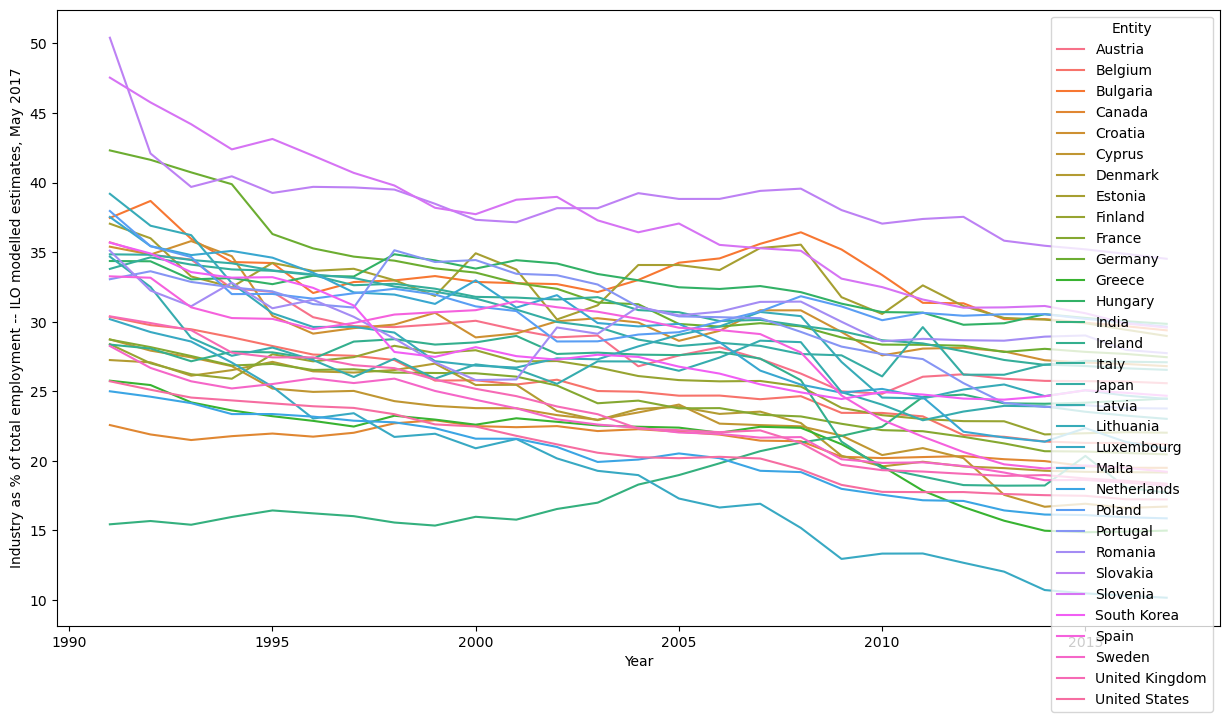

In [109]:
data_indu=data_indu[data_indu['Entity'].isin(countries_to_study)]
import seaborn as sns
import matplotlib.pyplot as plt

# 使用 lineplot 直接绘制
g = sns.lineplot(x='Year', y='Industry as % of total employment -- ILO modelled estimates, May 2017', hue='Entity', data=data_indu)

# 调整图表大小，确保所有细节都清晰可见
plt.gcf().set_size_inches(15, 8)

# 显示图表
plt.show()

In [110]:
list_year=data_indu['Year'].unique()
list_year_small=list_year
EU = [
    "Austria", "Belgium", "Bulgaria", "Croatia", "Cyprus", "Czech Republic",
    "Denmark", "Estonia", "Finland", "France", "Germany", "Greece", "Hungary",
    "Ireland", "Italy", "Latvia", "Lithuania", "Luxembourg", "Malta",
    "Netherlands", "Poland", "Portugal", "Romania", "Slovakia", "Slovenia",
    "Spain", "Sweden"
]
length=len(EU)
data_indu.rename(columns={"Industry as % of total employment -- ILO modelled estimates, May 2017":"indu_rate"},inplace=True)
data_indu_EU=data_indu[data_indu['Entity'].isin(EU)]
for i in list_year:
    tdf=data_indu[data_indu['Year']==i]
    new_row = pd.DataFrame({'Entity': ["EU"], 'Year': [i],'indu_rate':[tdf['indu_rate'].sum()/length]})
    data_indu=pd.concat([data_indu,new_row],axis=0)
data_indu=data_indu[data_indu['Entity'].isin(EU)==False]
data_indu=data_indu.reindex()
data_indu.reset_index(drop=True)

,Entity,Year,indu_rate
0,Canada,1991,22.577000
1,Canada,1992,21.900000
2,Canada,1993,21.500000
3,Canada,1994,21.778000
4,Canada,1995,21.966000
...,...,...,...
184,EU,2013,28.005037
185,EU,2014,27.742000
186,EU,2015,27.780481
187,EU,2016,27.425852


In [111]:
list_year=data_indu['Year'].unique()
list_year_small=list_year

In [112]:
data_with_popu_adjast_to_indu_year=data_with_popu[data_with_popu['Year'].isin(list_year_small)]

In [113]:
indu_rate=pd.DataFrame(data_indu['indu_rate'])
indu_rate=indu_rate.reset_index(drop=True)
data_with_popu_adjast_to_indu_year=data_with_popu_adjast_to_indu_year.reset_index(drop=True)
data_with_popu_and_indu=pd.concat([data_with_popu_adjast_to_indu_year,indu_rate],axis=1)

In [114]:
data_with_popu_and_indu

,Entity,Year,Renewables - % electricity,Population,indu_rate
0,Canada,1991,61.393510,28015762,22.577000
1,Canada,1992,61.643684,28347644,21.900000
2,Canada,1993,61.688430,28668168,21.500000
3,Canada,1994,60.328484,28981190,21.778000
4,Canada,1995,61.172176,29289430,21.966000
...,...,...,...,...,...
184,EU,2013,33.830066,2319034279,28.005037
185,EU,2014,36.361344,2339254235,27.742000
186,EU,2015,37.083920,2358856257,27.780481
187,EU,2016,39.064648,2378571328,27.425852


# now let us look at the ""

In [115]:
data_with_popu_and_indu = pd.DataFrame(data_with_popu_and_indu.iloc[:189])

In [116]:
data_with_popu_and_indu.to_csv("/Users/catillzhang/Downloads/data_with_popu_indu.csv")

In [117]:
data_to_be_done.columns

Index(['Year', 'Population', 'Fossil fuels (TWh)',
       'Annual greenhouse gas emissions in CO₂ equivalents',
       'Renewables (TWh growth - equivalent)',
       'Annual CO₂ emissions per GDP (kg per international-$)',
       'Industry as % of total employment -- ILO modelled estimates, May 2017',
       'Renewables - % electricity', 'GDP per capita'],
      dtype='object')

In [118]:
data_carbon=pd.read_csv("/Users/catillzhang/Downloads/final_cleaned_merged_data.csv")
data_carbon=data_carbon[['Entity','Year','Annual CO₂ emissions per GDP (kg per international-$)']]
data_carbon

,Entity,Year,Annual CO₂ emissions per GDP (kg per international-$)
0,Austria,1991,0.304481
1,Austria,1992,0.272204
2,Austria,1993,0.271598
3,Austria,1994,0.265797
4,Austria,1995,0.270428
...,...,...,...
859,United States,2013,0.340204
860,United States,2014,0.335424
861,United States,2015,0.318086
862,United States,2016,0.306069


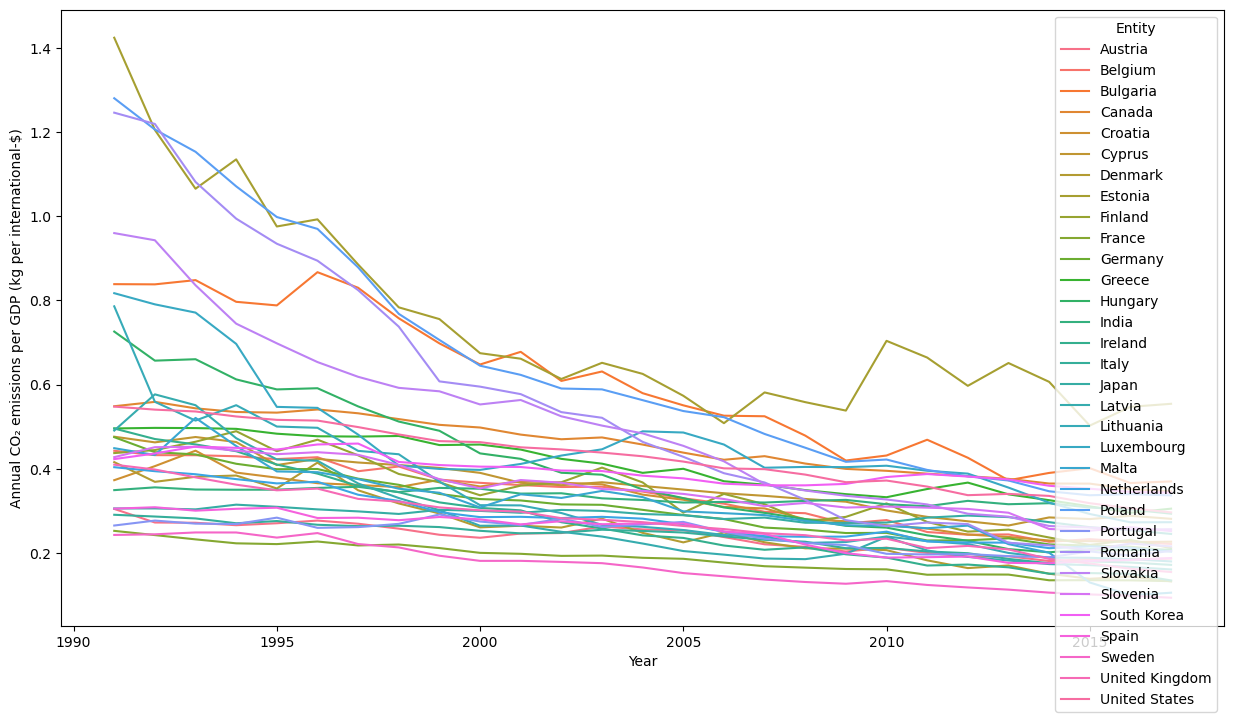

In [119]:
sb.lineplot(data=data_carbon,x='Year',y='Annual CO₂ emissions per GDP (kg per international-$)',hue='Entity')
plt.gcf().set_size_inches(15, 8)

# 显示图表
plt.show()

In [120]:
EU = [
    "Austria", "Belgium", "Bulgaria", "Croatia", "Cyprus", "Czech Republic",
    "Denmark", "Estonia", "Finland", "France", "Germany", "Greece", "Hungary",
    "Ireland", "Italy", "Latvia", "Lithuania", "Luxembourg", "Malta",
    "Netherlands", "Poland", "Portugal", "Romania", "Slovakia", "Slovenia",
    "Spain", "Sweden"
]
length=len(EU)
data_carbon_EU=data_carbon[data_carbon['Entity'].isin(EU)]
data_carbon_EU
list_year=data_carbon_EU['Year'].unique()
for i in list_year:
    tdf=data_carbon_EU[data_carbon_EU['Year']==i]
    new_row = pd.DataFrame({'Entity': ["EU"], 'Year': [i],'Annual CO₂ emissions per GDP (kg per international-$)':[tdf['Annual CO₂ emissions per GDP (kg per international-$)'].sum()/length]})
    data_carbon=pd.concat([data_carbon,new_row],axis=0)
data_carbon=data_carbon[data_carbon['Entity'].isin(EU)==False]
data_carbon=data_carbon.reindex()
data_carbon.reset_index(drop=True)

,Entity,Year,Annual CO₂ emissions per GDP (kg per international-$)
0,Canada,1991,0.548606
1,Canada,1992,0.558962
2,Canada,1993,0.543595
3,Canada,1994,0.534928
4,Canada,1995,0.533380
...,...,...,...
184,EU,2013,0.241167
185,EU,2014,0.228171
186,EU,2015,0.219603
187,EU,2016,0.217775


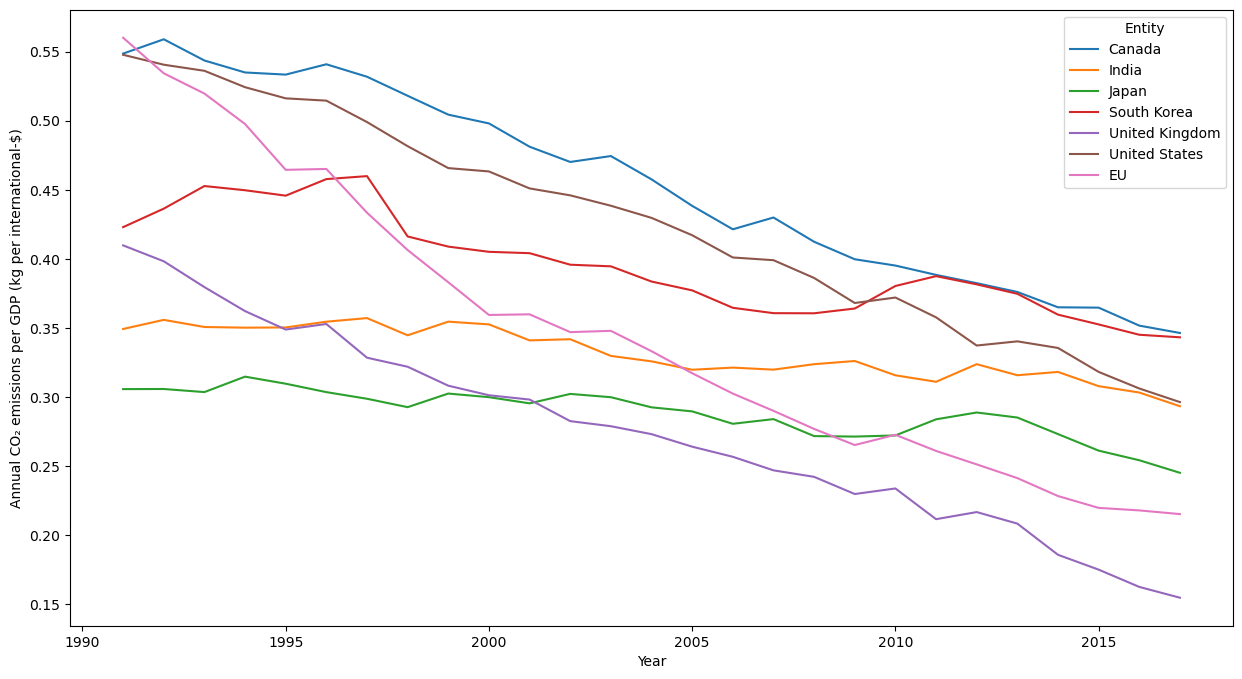

In [121]:
sb.lineplot(data=data_carbon,x='Year',y='Annual CO₂ emissions per GDP (kg per international-$)',hue='Entity')
plt.gcf().set_size_inches(15, 8)

# 显示图表
plt.show()

# in this plot, we can find that those country in our scope are obviously trying to reduce traditional industries that produce tons of co2, and this is indicated in the share of co2 per GDP.
# looked at UK, it is a country has relatively large population and has a poor history in using the clean energy, but it has a quite small per-co2 in GDP. i GUESS THAT ITS GDP IS VERY LARGE AND THUS THE PORTION REGARDING CO2 SEEMS TO NOT TO BE VERY OBVIOUS
# But this also offer an insight that even though by previous data the Canada is the country which adopt the clean energy to the most extend, it is the on that base on fuel to support its economy.
# so it can offer us an insight that issues regarding climate change and the interaction between different varible is much more complicated than we ever imagine

In [127]:
data_carbon_col=pd.DataFrame(data_carbon['Annual CO₂ emissions per GDP (kg per international-$)'])

In [128]:
data_carbon_col=data_carbon_col.reset_index()
data_with_all=pd.concat([data_with_popu_and_indu,data_carbon_col],axis=1)
data_with_all.to_csv("/Users/catillzhang/Downloads/all_we_need.csv")